In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import json

In [6]:
with open('../open-data/data/events/3749068.json') as f:
    match = json.load(f)

df = pd.json_normalize(match, sep='_').assign(match_id="7567")
shots = df[df.type_name == 'Shot'].set_index('id')

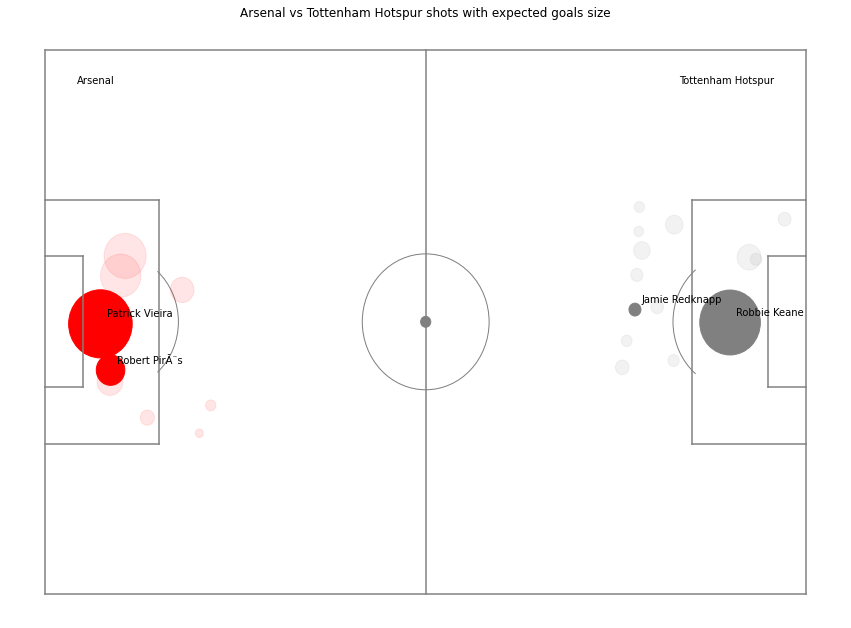

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from FCPython import createPitch

pitch_width = 120
pitch_height = 80

fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')

home_team = 'Tottenham Hotspur'
away_team = 'Arsenal'

for i, shot in shots.iterrows():
    x = shot['location'][0]
    y = shot['location'][1]
    
    goal = shot['shot_outcome_name']=='Goal'
    team_name = shot['team_name']
    
    circle_size = np.sqrt(shot['shot_statsbomb_xg'] * 30)
    
    if team_name == home_team:
        if goal:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='grey')
            plt.text((x+1), pitch_height-y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((x, pitch_height-y), circle_size, color='grey')
            shot_circle.set_alpha(.1)
    elif team_name == away_team:
        if goal:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='red')
            plt.text((pitch_width-x+1), y+1, shot['player_name'])
        else:
            shot_circle = plt.Circle((pitch_width-x, y), circle_size, color='red')
            shot_circle.set_alpha(.1)
    
    ax.add_patch(shot_circle)
    
plt.text(5, 75, away_team)
plt.text(100, 75, home_team)

plt.title('Arsenal vs Tottenham Hotspur shots with expected goals size')

fig.set_size_inches(15, 11)

plt.show()